# Kaggle 신용카드 부정결제 검출 (Google Drive Mount)
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : '0' (정상결제), '1' (부정결제)
* 부정 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Google Drive Mount
* 'creditCardFraud.zip' 파일을 구글드라이브에 업로드 후 진행

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* 마운트 결과 확인

In [19]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar 31 15:04 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [20]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


* creditcard.csv 파일 확인

In [21]:
!ls -l

total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 5 root root      4096 Sep 23 06:59 drive
drwxr-xr-x 1 root root      4096 Sep 16 13:40 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [22]:
%%time

import pandas as pd

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [23]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* '0' (정상) Class와 '1' (부정) Class 개수

In [24]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

* '0' (정상) Class와 '1' (부정) Class 비율

In [25]:
(DF.Class.value_counts() / DF.shape[0]) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

> ## 3) Time 열(Column) 삭제

In [26]:
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


> ## 4) train_test_split

* X (Input), y (Output) 지정

In [27]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

> ### (1) Without 'stratify'

In [28]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 불균형

In [29]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.825445
1     0.174555
Name: Class, dtype: float64
Test_Data : 
 0    99.831467
1     0.168533
Name: Class, dtype: float64


> ### (2) With 'Stratify'

In [30]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [31]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test_Data : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


## 데이터 분포 시각화

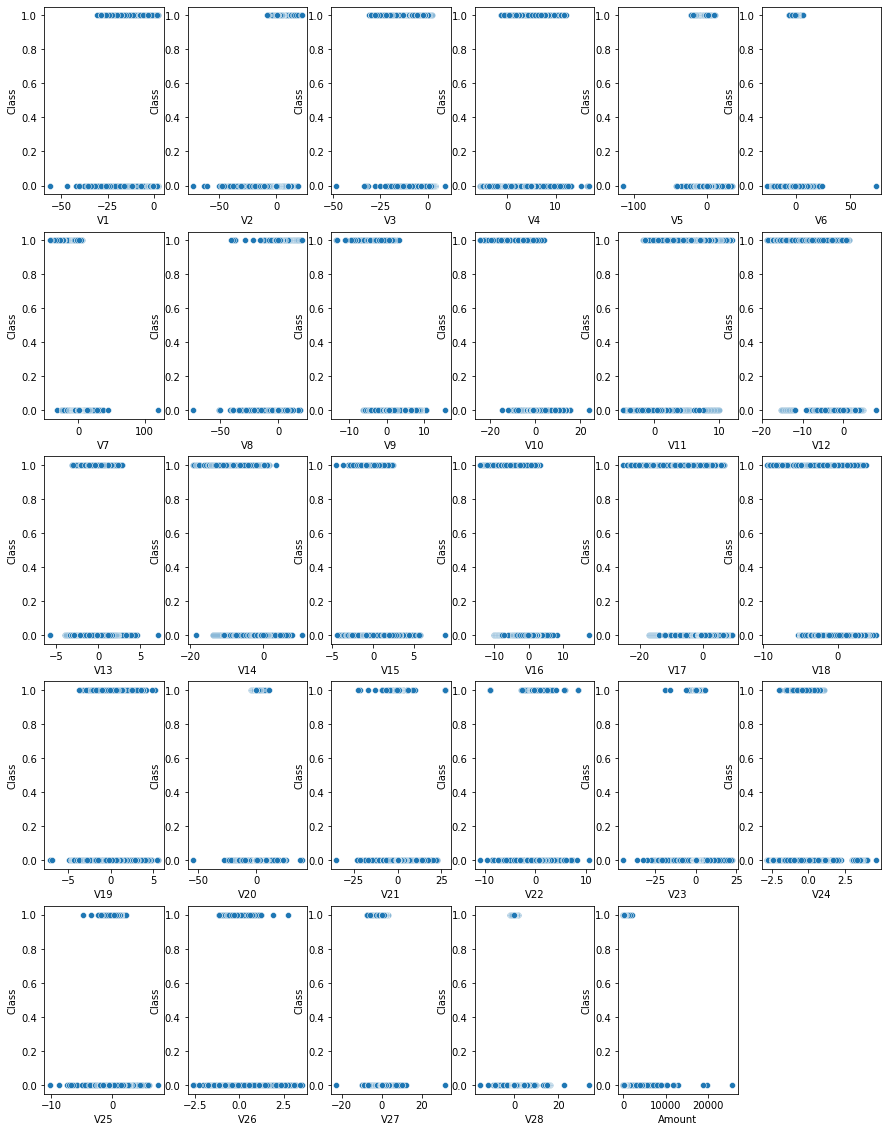

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,20))

for i in range(29):
    plt.subplot(5,6,i+1)
    sns.scatterplot(x=DF.iloc[:,i], y = DF.Class)

plt.show()

# III. Modeling

## 1) Logistic Regression

In [32]:
# 모델 생성

from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# 모델 적용

y_hat = Model_lr.predict(X_test)

In [37]:
# Model Validation ---> Recall

from sklearn.metrics import recall_score, f1_score

print('recall_score : ', recall_score(y_test,y_hat,pos_label=1))
print('f1_score : ', f1_score(y_test, y_hat, pos_label = 1))

recall_score :  0.75
f1_score :  0.8072727272727273


## 2) Decision Tree

In [41]:
# 모델 생성

from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(max_depth = 5, random_state=2045)
Model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

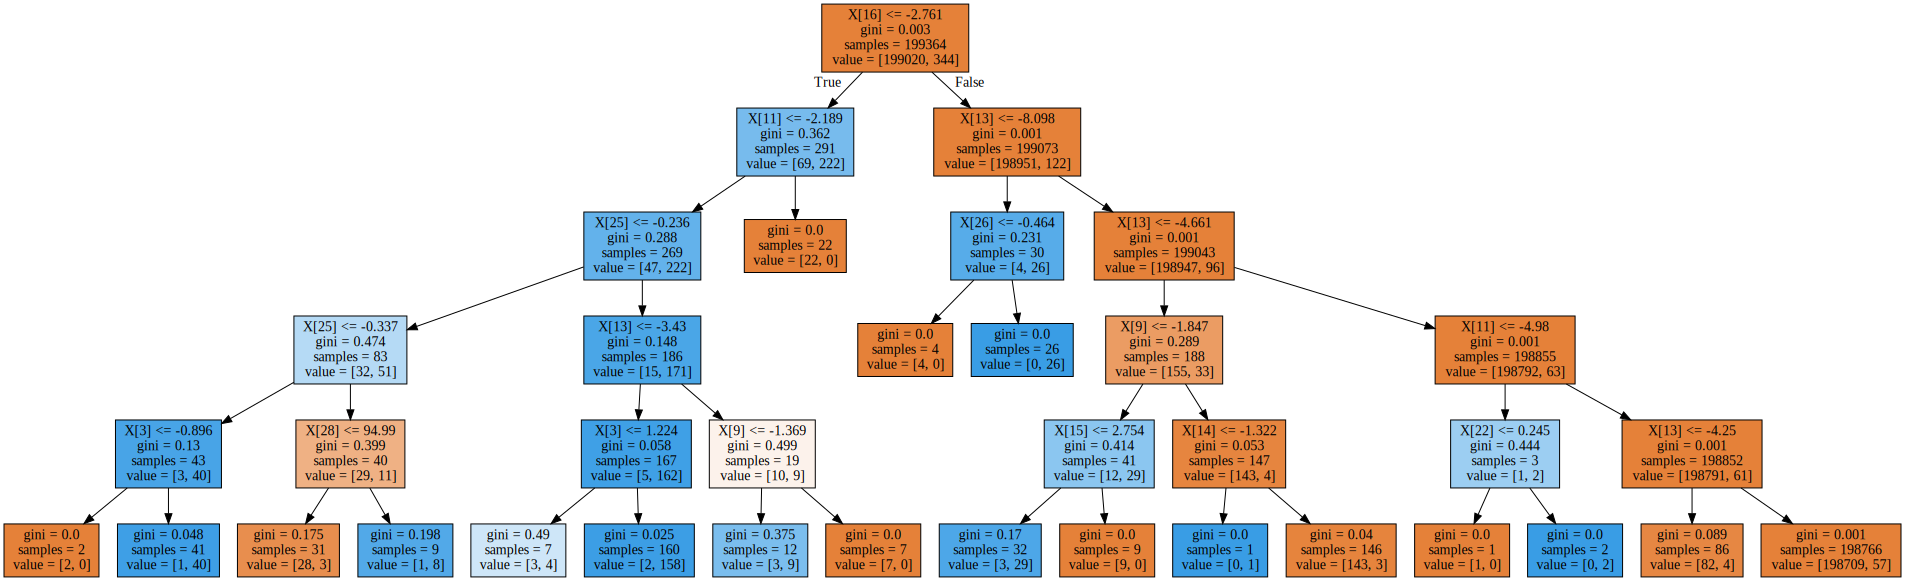

In [42]:
# 모델 시각화

from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_dt, filled = True))

In [43]:
# model 적용

y_hat = Model_dt.predict(X_test)

In [46]:
# Model Evaluate

print('recall_score : ', recall_score(y_test,y_hat, average = None))
print('f1_score : ', f1_score(y_test,y_hat,average = None))

recall_score :  [0.99982414 0.83108108]
f1_score :  [0.99976553 0.86013986]


In [47]:
# feature importance 

Model_dt.feature_importances_

array([0.        , 0.        , 0.        , 0.01116995, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06498814,
       0.        , 0.05698565, 0.        , 0.12257226, 0.00357606,
       0.0216525 , 0.63370038, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00250214, 0.        , 0.        ,
       0.05341607, 0.01301114, 0.        , 0.0164257 ])

## 3) **Random_Forest**

In [67]:
# 모델 생성 

%%time

Model_rf1 = RandomForestClassifier(n_estimators = 20,
                                   max_features = 5,
                                   random_state=2045,
                                   n_jobs=-1)

Model_rf1.fit(X_train, y_train)

CPU times: user 56.6 s, sys: 70.7 ms, total: 56.7 s
Wall time: 36.3 s


In [68]:
# 모델적용

y_hat = Model_rf1.predict(X_test)


In [69]:
# Model Evaluate

print('recall_score : ', recall_score(y_test,y_hat))

recall_score :  0.8108108108108109


In [70]:
# feature importance

Model_rf1.feature_importances_

array([0.0174647 , 0.01472015, 0.02015127, 0.03090838, 0.00907693,
       0.01294209, 0.0284092 , 0.00909202, 0.04178681, 0.04031628,
       0.05742853, 0.14482461, 0.01324025, 0.12878152, 0.01333681,
       0.04276068, 0.18776182, 0.03395113, 0.01599362, 0.01400468,
       0.0155667 , 0.01187564, 0.00831373, 0.00816045, 0.01003829,
       0.01854258, 0.02228926, 0.01547326, 0.01278862])

In [71]:
# 모델 생성 

%%time

Model_rf1 = RandomForestClassifier(n_estimators = 30,
                                   max_features = 6,
                                   random_state=2045,
                                   n_jobs=-1)

Model_rf1.fit(X_train, y_train)

# 모델적용

y_hat = Model_rf1.predict(X_test)

# Model Evaluate

print('recall_score : ', recall_score(y_test,y_hat))

# feature importance

print('feature_importance: ',Model_rf1.feature_importances_)

recall_score :  0.8378378378378378
feature_importance:  [0.01583077 0.01323045 0.01968466 0.02401221 0.01003705 0.01610404
 0.02243149 0.01137503 0.01882636 0.09241764 0.04877879 0.1322796
 0.01067496 0.11938352 0.01686453 0.06866055 0.18339046 0.02852685
 0.01259531 0.0141783  0.02312287 0.01065381 0.00719326 0.00878772
 0.00941155 0.02073258 0.01669785 0.01292473 0.01119307]
CPU times: user 1min 41s, sys: 60.1 ms, total: 1min 41s
Wall time: 52.5 s


In [72]:
# 모델 생성 

%%time

Model_rf1 = RandomForestClassifier(n_estimators = 30,
                                   max_features = 11,
                                   random_state=2045,
                                   n_jobs=-1)

Model_rf1.fit(X_train, y_train)

# 모델적용

y_hat = Model_rf1.predict(X_test)

# Model Evaluate

print('recall_score : ', recall_score(y_test,y_hat))

# feature importance

print('feature_importance: ',Model_rf1.feature_importances_)

recall_score :  0.8243243243243243
feature_importance:  [0.01367075 0.01022989 0.01236691 0.01512457 0.00625603 0.01182222
 0.02840448 0.00975229 0.01305637 0.1393432  0.05655833 0.16826949
 0.01166954 0.10471106 0.0134775  0.04890838 0.19762224 0.01060054
 0.01212031 0.01039114 0.01106746 0.00975029 0.00645392 0.006181
 0.00837298 0.02477325 0.01523697 0.01278311 0.01102579]
CPU times: user 3min 3s, sys: 120 ms, total: 3min 3s
Wall time: 1min 34s


In [77]:
# 모델 생성 

%%time

Model_rf1 = RandomForestClassifier(n_estimators = 50,
                                   max_features = 20,
                                   random_state=2045,
                                   n_jobs=-1)

Model_rf1.fit(X_train, y_train)

# 모델적용

y_hat = Model_rf1.predict(X_test)

# Model Evaluate

print('recall_score : ', recall_score(y_test,y_hat))

# feature importance

print('feature_importance: ',Model_rf1.feature_importances_)

recall_score :  0.8513513513513513
feature_importance:  [0.0116176  0.00522079 0.01051404 0.0166032  0.00649884 0.00686247
 0.02142228 0.00588221 0.01156311 0.08511885 0.02073412 0.17330379
 0.01328055 0.08013706 0.01338053 0.02741072 0.34845901 0.00727695
 0.00855933 0.00918291 0.0141719  0.00741857 0.00556861 0.00650603
 0.00822376 0.03720174 0.01610794 0.00989713 0.01187596]
CPU times: user 8min 44s, sys: 424 ms, total: 8min 44s
Wall time: 4min 32s


In [73]:
# 모델 생성 - GridSearchCV

from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier()

params = {'n_estimators':[10,30,50],
          'max_features':[6,7,8],
          'max_depth':[4,5,6],
          'random_state':[2045]}


In [74]:
# 3-fold Cross validation

from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(Model_rf,
                       param_grid = params,
                       scoring = 'recall',
                       refit = True,
                       n_jobs=-1)

In [75]:
# gridSearchCV

%%time

grid_cv.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
# best_score_ & best_paras_

print(grid_cv.best_score_)
print(grid_cv.best_params_)

In [ ]:
# model evaluation

Model_CV = grid_cv.best_estimator_
y_hat = Model_CV.predict(X_test)

print(recall_score(y_test,y_hat))

# 
# 
# 
# The End
# 
# 
# 